##**1 Introducción**
En este taller, trabajaremos con un conjunto de datos relacionado con la salida de clientes de un servicio
bancario. El objetivo es aplicar tecnicas de analisis de datos y Machine Learning para predecir la salida
de clientes (Exited) basandonos en las caracterısticas de los mismos.
El conjunto de datos contiene las siguientes columnas:

• **RowNumber:**Numero de fila

• **CustomerId:** Identificador unico del cliente

• **Surname:** Apellido del cliente

**• CreditScore:** Puntuacion de credito del cliente

**• Geography:** Paıs de residencia del cliente

**• Gender:** Genero del cliente

**• Age:** Edad del cliente

**• Tenure:** Duracion del cliente con el banco (en años)

**• Balance:** Balance bancario del cliente

**• NumOfProducts:** Numero de productos adquiridos por el cliente

**• HasCrCard:** Indica si el cliente tiene tarjeta de credito (0: No, 1: Si)

**• IsActiveMember:** Indica si el cliente es miembro activo del banco (0: No, 1: Si)

**• EstimatedSalary:** Ingreso anual estimado del cliente

**• Exited:** Indica si el cliente ha abandonado el banco (0: No, 1: Si)

•**Complain:** Indica si el cliente ha realizado una queja (0: No, 1: Si)

**•Satisfaction Score:** Puntuacion de satisfaccion del cliente

**• Card Type:** Tipo de tarjeta asociada al cliente (DIAMOND, GOLD, etc.)

**• Point Earned:** Puntos ganados por el cliente


In [40]:
!wget -O Customer-Churn-Records.csv 'https://raw.githubusercontent.com/AndoGB/IntroMachineLearning/main/Segundo%20Corte/Customer-Churn-Records.csv'

--2025-04-30 17:25:10--  https://raw.githubusercontent.com/AndoGB/IntroMachineLearning/main/Segundo%20Corte/Customer-Churn-Records.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 837415 (818K) [text/plain]
Saving to: ‘Customer-Churn-Records.csv’

Customer-Churn-Reco 100%[===================>] 817.79K  --.-KB/s    in 0.06s   

2025-04-30 17:25:11 (12.7 MB/s) - ‘Customer-Churn-Records.csv’ saved [837415/837415]



In [41]:
import pandas as pd

In [43]:
DATA = pd.read_csv("Customer-Churn-Records.csv")
DATA.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [75]:
!pip install imblearn
!pip install numpy
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve  # Import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

##**2 Preguntas Teoricas**
Responde las siguientes preguntas relacionadas con los conceptos de analisis de datos, estadisticas y
Machine Learning

##**2.1 Pregunta 1: Analisis Exploratorio de Datos (EDA)**
¿Que pasos seguirıas para realizar un analisis exploratorio de los datos antes de construir un modelo de
Machine Learning? Explica cada paso y menciona las herramientas que utilizarıas.

**Definir el dataset, visualizar la diferntes variables por medio del uso de head, info y describe, realizar una limpieza de los daros nulos**


##**2.2 Pregunta 2: Preprocesamiento de Datos**
Imagina que uno de los datos contiene valores faltantes o atıpicos (outliers). ¿Que tecnicas utilizarıas
para tratar con estos problemas en el conjunto de datos de la tabla? Justifica tu respuesta.

**Usaria DATA.dropna despues de identificar las filas con valores faltantes o DATA.fillna para sustituir los datos nulos con valor estimado o 0.**

##**2.3 Pregunta 3: Modelos de Clasificacion**
En este caso, el objetivo es predecir si un cliente abandonara el banco (Exited) basandonos en sus
caracterısticas. ¿Que tipo de modelo de clasificacion usarıas y por que? Discute las ventajas y desventajas
de este modelo.

**Se plantea un modelo de rgresion logistica para la prediccion de la variable binaria, ya que este nos muestra la probabilidad de abandono del cliente de forma sencilla; aunque es suceptible a la presencia de datos nulos en el dataset o la presencia de variables poco relacionadas**



##**2.4 Pregunta 4: Desbalanceo de Clases**
¿Que es el desbalanceo de clases y por que es un problema al entrenar un modelo de clasificacion? ¿Que
tecnicas utilizarıas para abordar este problema, como SMOTE?

**El desbalance de clases es un problema relacionado a datasets donde hay una presencia signifcativamente mas grande de un tipo de problema frente a otros por lo que el modelo es susceptible a problema de overfitting donde el modelo solo este entrenado para predecir de manera apropiada en uno de los grupos; los datos se pueden balancear con el uso de SMOTE**

##**2.5 Pregunta 5: Overfitting**
¿Que es el overfitting y como puedes detectarlo en un modelo de Machine Learning? Explica que medidas
tomarıas para evitar el sobreajuste y mejorar la capacidad de generalizacion de tu modelo.

**Es un problema en modelos de aprendizaje cuando el modelo se ajusta demasiado a un tipo de problema durante el entranamiento y se vuelve ineficaz con datos diferentes durante la prueba, teniendo una mala capacidad de generalizacion lo que afecta directamente la capacidad del modelo para predecir; para esto se puede optar por la simplificacion del modelo o la exposicion estratificada a diferentes datos durante el entrenamiento**


#**3 Ejercicios Practicos**
**3.1 Ejercicio 1: Analisis Descriptivo**

Usa la tabla de datos proporcionada para realizar un analisis descriptivo de las variables numericas.
Responde a las siguientes preguntas:

• ¿Cual es el promedio de la puntuacion de credito (CreditScore) de los clientes?

**650.528800**

• ¿Cual es el balance promedio (Balance) de los clientes que abandonaron el banco (Exited = 1)?

**91109.47600588812**


• ¿Cual es la edad promedio (Age) de los clientes activos (IsActiveMember = 1)?

**39.7914967967385**

In [50]:
DATA.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [51]:
clientes_que_abandonaron= DATA[DATA["Exited"] == 1]
balance_promedio_abandonaron = clientes_que_abandonaron["Balance"].mean()
print(f"El balance promedio de los clientes que abandonaron el banco es: {balance_promedio_abandonaron}")

El balance promedio de los clientes que abandonaron el banco es: 91109.47600588812


In [52]:
clientes_activos = DATA[DATA['IsActiveMember'] == 1]
edad_promedio_activos = clientes_activos['Age'].mean()
print(f"Edad promedio de los clientes activos : {edad_promedio_activos}")

Edad promedio de los clientes activos : 39.7914967967385


##**3.2 Ejercicio 2: Preprocesamiento de Datos**
Realiza los siguientes pasos de preprocesamiento:

• Convierte la variable Gender en una variable binaria (0: Female, 1: Male).

• Convierte la variable Geography en variables dummy (Francia = 1, España = 0, etc.).

• Rellena los valores faltantes, si los hubiera, con la media de la columna correspondiente.

• Escala las variables numericas (como CreditScore, Age, Balance, EstimatedSalary) utilizando
Min-Max o StandardScaler.

In [53]:
DATA

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [54]:
DATA['Gender'] = DATA['Gender'].map({'Female': 0, 'Male': 1})

In [56]:
country_mapping = {
    'France': 1,
    'Spain': 0,
    'Germany': 2,
}

DATA['Geography'] = DATA['Geography'].map(country_mapping)


In [57]:
DATA

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,1,0,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,0,0,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,1,0,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,1,0,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,0,0,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,1,1,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,1,1,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,1,0,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,2,1,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [58]:
print("valores nulos en geography", (DATA['Geography'].isnull().sum()))
print("valores nulos en gender", (DATA['Gender'].isnull().sum()))

valores nulos en geography 0
valores nulos en gender 0


In [59]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary',  'Complain', 'Satisfaction Score', 'Point Earned']

scaler = MinMaxScaler()

DATA[numerical_features] = scaler.fit_transform(df[numerical_features])

DATA

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,0.538,1,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1.0,0.25,DIAMOND,0.391600
1,2,15647311,Hill,0.516,0,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,1.0,0.50,DIAMOND,0.382520
2,3,15619304,Onio,0.304,1,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.0,0.50,DIAMOND,0.292849
3,4,15701354,Boni,0.698,1,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0.0,1.00,GOLD,0.262202
4,5,15737888,Mitchell,1.000,0,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0.0,1.00,GOLD,0.347333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,0.842,1,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,0.0,0.00,DIAMOND,0.205448
9996,9997,15569892,Johnstone,0.332,1,1,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,0.0,1.00,PLATINUM,0.740068
9997,9998,15584532,Liu,0.718,1,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1.0,0.50,SILVER,0.505108
9998,9999,15682355,Sabbatini,0.844,2,1,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,1.0,0.25,GOLD,0.249716


##**3.3 Ejercicio 3: Analisis de Correlacion**
Realiza un analisis de correlacion entre las siguientes variables:

• CreditScore y Balance

**Al ser un valor muy cercano a 0, indica un muy bajo de nivel de correlacion entre variables**

• Age y EstimatedSalary
**Al ser un valor muy cercano a 0 inidca un bajo nivel de correlacion entre la variables y al ser negativo indica una leve tendencia de correlacion negativa**

• Tenure y NumOfProducts
**Al ser un valor muy cercano a 0, indica un muy bajo de nivel de correlacion entre variables**

Discute los resultados obtenidos, ¿existen correlaciones fuertes entre algunas variables? ¿Como afectarıa
esto a un modelo predictivo?
**Se observa una mayor correlacion en datos como Exited-Complain, Exited-Gender, Numofproductos-Balance (Negativa). La variables con niveles mas altos de correlacion resultan mas utiles para la prediccion, ya que su comportamiento se muestra relevante para el resultado final. Cuando hay varias variables con alta correlacion se dificulta la interpretabilidad del modelo**


<Axes: >

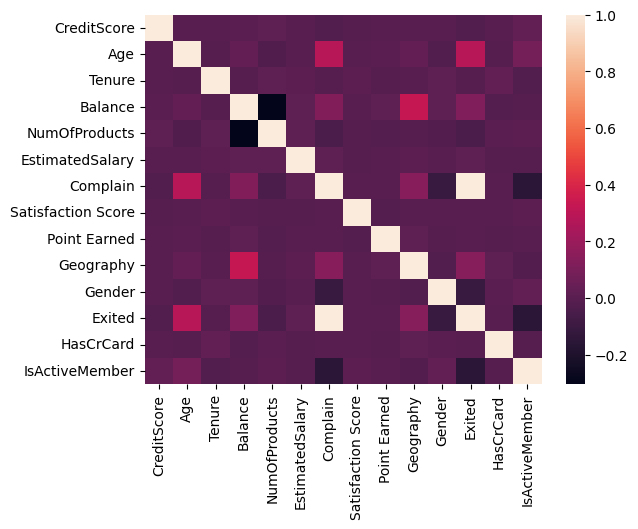

In [77]:
import seaborn as sns
numerical_features1 = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                      'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Point Earned',
                      'Geography', 'Gender','Exited','HasCrCard', 'IsActiveMember']


correlation_matrix = DATA[numerical_features1].corr()
sns.heatmap(correlation_matrix)

In [78]:
correlation = DATA['CreditScore'].corr(DATA['Balance'])
print(f"correlacion entre CreditScore y Balance: {correlation}")

correlacion entre CreditScore y Balance: 0.006268381616008735


In [79]:
correlation = DATA['Age'].corr(DATA['EstimatedSalary'])
print(f"correlacion entre Age y EstimatedSalary: {correlation}")

correlacion entre Age y EstimatedSalary: -0.007201042376657296


In [80]:
correlation = DATA['Tenure'].corr(DATA['NumOfProducts'])
print(f"correlacion entre Tenure y NumOfProducts: {correlation}")

correlacion entre Tenure y NumOfProducts: 0.01344375546074733


##**3.4 Ejercicio 4: Comparacion de Modelos de Clasificacion**
Usando la tabla de datos, entrena dos modelos de clasificaci´on: Regresi´on Log´ıstica y Arbol de ´
Decisi´on para predecir la salida de clientes (Exited). Compara los modelos utilizando la m´etrica ROC
AUC. Para esto, sigue los pasos:

• Preprocesa los datos (conversion de variables categoricas, manejo de valores faltantes).

• Divide los datos en un conjunto de entrenamiento y uno de prueba.

• Entrena los modelos de Regresion Logıstica y Arbol de Decision .

• Calcula la metrica ROC AUC para cada modelo y comparalos.

• Si detectas desbalanceo de clases, aplica SMOTE para equilibrar el dataset antes de entrenar los
modelos.

Discute los resultados obtenidos. ¿Cual modelo es el mas adecuado para este problema? ¿Por que?

**Las metricas ROC y AUC indican que el modelo de regresion logistica es mas optimo para este problema**

In [81]:
X = DATA[["Age", "Gender", "Complain", "IsActiveMember"]]
y = DATA["Exited"]

In [82]:
X.isnull().sum()

,0
Age,0
Gender,0
Complain,0
IsActiveMember,0


In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)

print("Distribución de clases en entrenamiento (proporciones):")
print(y_train.value_counts(normalize=True))


Dimensiones del conjunto de entrenamiento: (8000, 4)
Dimensiones del conjunto de prueba: (2000, 4)
Distribución de clases en entrenamiento (proporciones):
Exited
0    0.79625
1    0.20375
Name: proportion, dtype: float64


In [84]:
from imblearn.over_sampling import SMOTE
if y_train.value_counts(normalize=True).max() > 0.60:
    print("Aplicando SMOTE para balancear el conjunto de entrenamiento...")

    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print("Nueva distribución de clases:")
    print(pd.Series(y_train).value_counts(normalize=True))

Aplicando SMOTE para balancear el conjunto de entrenamiento...
Nueva distribución de clases:
Exited
0    0.5
1    0.5
Name: proportion, dtype: float64


In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [86]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [87]:
logreg_preds = logreg_model.predict_proba(X_test)[:, 1]
tree_preds = tree_model.predict_proba(X_test)[:, 1]

logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_preds)
logreg_roc_auc = roc_auc_score(y_test, logreg_preds)

tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_preds)
tree_roc_auc = roc_auc_score(y_test, tree_preds)

print(f"Logistic Regression ROC AUC: {logreg_roc_auc}")
print(f"Decision Tree ROC AUC: {tree_roc_auc}")

Logistic Regression ROC AUC: 0.9984257993398364
Decision Tree ROC AUC: 0.9972010789240319


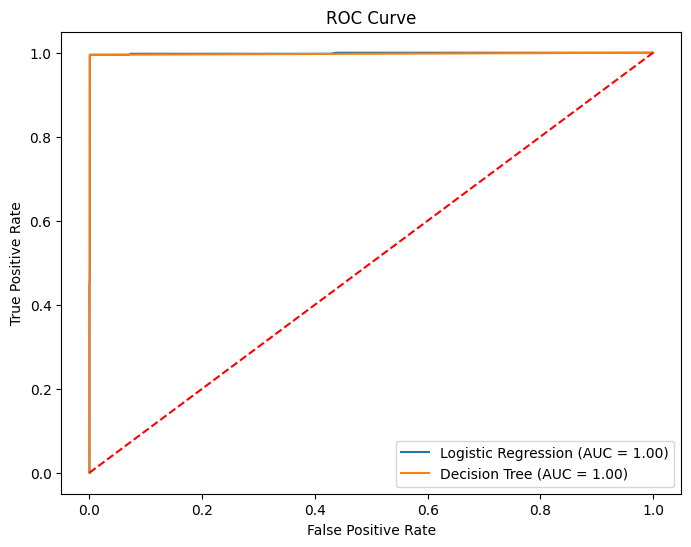

In [88]:
plt.figure(figsize=(8, 6))
plt.plot(logreg_fpr, logreg_tpr, label=f"Logistic Regression (AUC = {logreg_roc_auc:.2f})")
plt.plot(tree_fpr, tree_tpr, label=f"Decision Tree (AUC = {tree_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

#**3.5 Ejercicio 5: Evaluacion del Desempeno del Modelo**
Despu´es de entrenar los modelos, eval´ua su desempe˜no usando m´etricas adicionales como precisi´on, recall, F1 y la matriz de confusi´on. Responde las siguientes preguntas:

• ¿Qu´e modelo tiene el mejor desempe˜no general? Justifica tu respuesta utilizando las m´etricas.
**Tras el ajuste del modelo por medio del balanceo de clases ambos muestran un prescion identica basado en su accuracy de 100**

• ¿C´omo impacta el desbalanceo de clases en la m´etrica ROC AUC y en otras m´etricas?
**El desbalanceo tiene un impacto moderado en estas metricas ya que se limitan a evaluar la capacidad del modelo para distinguir entre clases, otras metricas como la exactitud pueden ser engañosas al mostrar valores altos incluso en casos donde el modelo no ha sido balanceado; mientras el F1-puede ser la medida optima de precisión y recall, proporcionando una evaluación más equilibrada del rendimiento en escenarios de desbalanceo**

• ¿Qu´e acciones tomar´ıas si el modelo tiene un alto sesgo hacia la clase mayoritaria?"
**Balancear las clases y determinar como esto puede afectar de manera positiva o no la capacidad predictiva del modelo en todos los casos**

In [89]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix

y_pred_test = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy del modelo: {accuracy:.2f}')

matriz_confusion = confusion_matrix(y_test, y_pred_test)
print('Matriz de Confusión:')
display(matriz_confusion)

reporte = classification_report(y_test, y_pred_test)
print('Reporte de Clasificación:')
print(reporte)

precision = precision_score(y_test, y_pred_test)
print(f"Precisión: {precision:.2f}")

recall = recall_score(y_test, y_pred_test)
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred_test)
print(f"F1-score: {f1:.2f}")

Accuracy del modelo: 1.00
Matriz de Confusión:


array([[1591,    1],
       [   2,  406]])

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Precisión: 1.00
Recall: 1.00
F1-score: 1.00


In [90]:
y_pred_test_tree = tree_model.predict(X_test)  # Get predictions for Decision Tree

accuracy = accuracy_score(y_test, y_pred_test_tree)  # Use Decision Tree predictions
print(f'Accuracy del modelo: {accuracy:.2f}')

matriz_confusion = confusion_matrix(y_test, y_pred_test_tree)  # Use Decision Tree predictions
print('Matriz de Confusión:')
display(matriz_confusion)

reporte = classification_report(y_test, y_pred_test_tree)  # Use Decision Tree predictions
print('Reporte de Clasificación:')
print(reporte)

precision = precision_score(y_test, y_pred_test_tree)  # Use Decision Tree predictions
print(f"Precisión: {precision:.2f}")

recall = recall_score(y_test, y_pred_test_tree)  # Use Decision Tree predictions
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred_test_tree)  # Use Decision Tree predictions
print(f"F1-score: {f1:.2f}")

Accuracy del modelo: 1.00
Matriz de Confusión:


array([[1591,    1],
       [   2,  406]])

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Precisión: 1.00
Recall: 1.00
F1-score: 1.00


##**4 Reflexi´on Cr´ıtica**
Despu´es de completar los ejercicios, reflexiona sobre los siguientes puntos:

• ¿Qu´e desaf´ıos enfrentaste al trabajar con los datos proporcionados?
**Ambos metodos parecen estar sobreajustados tras la aplicacion de la funcion SMOTE por lo que se generan dudas sobre la eficiencia real del modelo basandose en su accuracy**

• ¿Qu´e mejorar´ıas en el proceso de preprocesamiento de datos?
**No usar SMOTE en el modelo y medir el desempeño general de este con los datos desbalanceados**

• Si pudieras recolectar m´as datos, ¿qu´e variables adicionales ser´ıan ´utiles para mejorar el modelo
de clasificaci´on?
**Se pueden considerar variables como la frecuencia de uso de los productos bancarios, el nivel general de la satisfaccion del cliente con el servicio prestado y si este tiene productos bancarios de otras entidades**

• ¿C´omo asegurar´ıas que el modelo generalice bien y no est´e sobreajustado?
**Corriendo el aprendizaje del modelo y su prueba tanto con los datos desbalanceados como los balanceados**

• ¿Qu´e impacto tuvo el desbalanceo de clases en la precisi´on de tu modelo? ¿C´omo se resolvi´o con
SMOTE?
**Se intuye que el uso de la funcion SMOTE en el balanceo de clases pudo cesgar el modelo**

• ¿C´omo detectar´ıas y manejar´ıas el overfitting en un modelo de Machine Learning? ¿Qu´e t´ecnicas
implementar´ıas para mejorar la capacidad de generalizaci´on?
**Buscaria ampliar el volumen de datos inicial y realizaria una estratificacion al momento de separar los datos que se emplearan en el proceso de aprendizaje de modelo**
